# Subject 6: Around Simpson's Paradox

**Project completed by:** Mingming GUO

### Prerequisites : Averaging and ratio calculation, simple graphical presentation techniques, possibly logistic regression

In 1972-1974, in Whickham, a town in the northeast of England located about 6.5 km southwest of Newcastle upon Tyne, a survey of one-sixth of the electorate was conducted to inform research on thyroid and heart diseases (Tunbridge et al., 1977). A follow-up study was carried out twenty years later (Vanderpump et al., 1995). Some results concerned smoking and examined whether individuals were still alive during the second study.

For simplicity, we will restrict ourselves to women and among them, the 1314 categorized as "currently smoking" or "never smoked". There were relatively few women in the initial survey who had quit smoking (162) and very few for whom information was unavailable (18). Survival at 20 years was determined for all women in the first survey.

The data are available in this CSV file. Each line indicates whether the person smokes or not, if she was alive or deceased at the time of the second study, and her age at the time of the first survey.




## Instructions

1. Represent in a table the total number of women alive and deceased over the period according to their smoking habits. Calculate the mortality rate in each group (smokers / non-smokers) as the ratio between the number of women who died in the group and the total number of women in that group. You may propose a graphical representation of these data and calculate confidence intervals if you wish. Why is this result surprising?

2. Repeat question 1 (numbers and mortality rates) by adding a new category related to age group. For example, consider the following age classes: 18-34 years, 34-54 years, 55-64 years, over 65 years. Why is this result surprising? Can you explain this paradox? You may also propose a graphical representation to support your explanation.

3. To avoid bias caused by grouping into arbitrary and irregular age brackets, try to perform logistic regression. By introducing a variable Death taking values 1 or 0 indicating if the individual died during the 20-year period, we can study the model Death ~ Age to analyze the probability of death as a function of age for smokers and non-smokers.

Do these regressions allow you to conclude on the harmfulness of smoking? You can propose a graphical representation of these regressions (including confidence regions).

---

## I) Import data

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')

data_file = "Subject6_smoking.csv"
data = pd.read_csv(data_file)
data.head()

Smoker Status   Age
0    Yes  Alive  21.0
1    Yes  Alive  19.3
2     No   Dead  57.5
3     No  Alive  47.1
4    Yes  Alive  81.4

## II) Check and handle missing data

In [8]:
df = pd.DataFrame({
    "smoker": data["Smoker"].apply(lambda val: 1 if val == "Yes" else 0),
    "alive": data["Status"].apply(lambda val: 1 if val == "Alive" else 0),
    "age": data["Age"]
})

df.describe()

age        alive       smoker
count  1314.000000  1314.000000  1314.000000
mean     47.359361     0.719178     0.442922
std      19.160667     0.449572     0.496921
min      18.000000     0.000000     0.000000
25%      31.300000     0.000000     0.000000
50%      44.800000     1.000000     0.000000
75%      60.600000     1.000000     1.000000
max      89.900000     1.000000     1.000000

## III) Initial data visualization

Total number of women in the study: 1314
Number of women who died during the study: 369
Number of women still alive after the study: 945
Number of non-smoking women: 732
Number of smoking women: 582


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


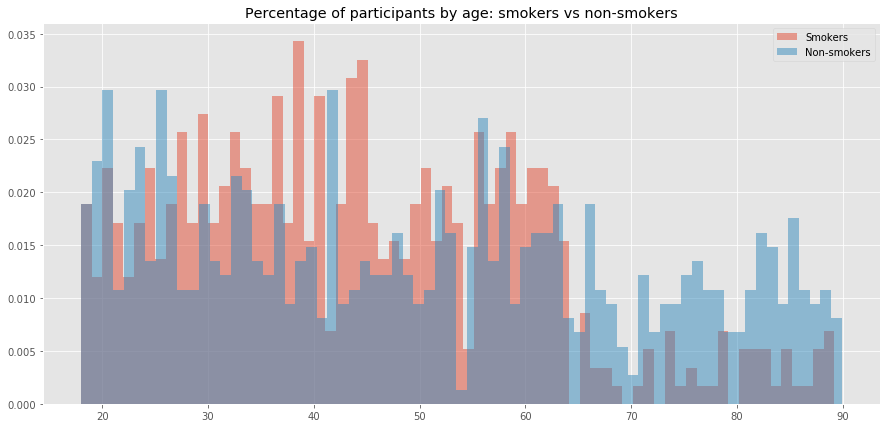

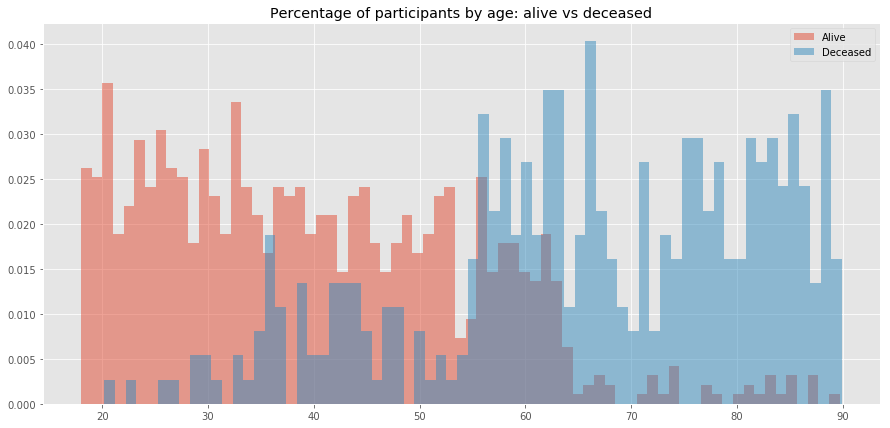

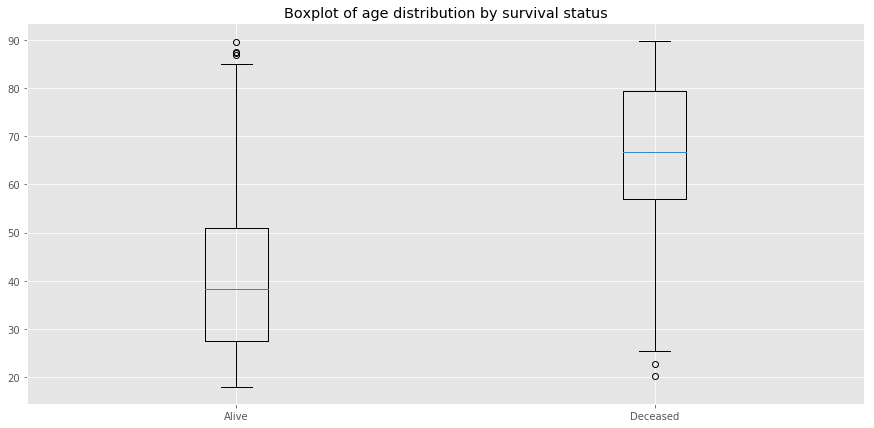

In [10]:
print("Total number of women in the study: " + str(len(df["alive"])))
print("Number of women who died during the study: " + str(np.sum(df["alive"] == 0)))
print("Number of women still alive after the study: " + str(np.sum(df["alive"])))
print("Number of non-smoking women: " + str(np.sum(df["smoker"] == 0)))
print("Number of smoking women: " + str(np.sum(df["smoker"])))

df_smoker = df[df["smoker"] == 1]
df_nonsmoker = df[df["smoker"] == 0]
df_alive = df[df["alive"] == 1]
df_dead = df[df["alive"] == 0]

def mortality_rate(df):
    return np.sum(df["alive"] == 0) / len(df["alive"])

def smoking_rate(df):
    return np.sum(df["smoker"] == 1) / len(df["smoker"])

fig, ax = plt.subplots(figsize=(15,7))
ax.hist(df_smoker['age'], bins=int(np.max(df_smoker['age']) - np.min(df_smoker['age'])),
        density=True, alpha=0.5, label="Smokers")
ax.hist(df_nonsmoker['age'], bins=int(np.max(df_nonsmoker['age']) - np.min(df_nonsmoker['age'])),
        density=True, alpha=0.5, label="Non-smokers")
plt.legend()
plt.title("Percentage of participants by age: smokers vs non-smokers")

fig, ax = plt.subplots(figsize=(15,7))
ax.hist(df_alive['age'], bins=int(np.max(df_alive['age']) - np.min(df_alive['age'])),
        density=True, alpha=0.5, label="Alive")
ax.hist(df_dead['age'], bins=int(np.max(df_dead['age']) - np.min(df_dead['age'])),
        density=True, alpha=0.5, label="Deceased")
plt.legend()
plt.title("Percentage of participants by age: alive vs deceased")

fig, ax = plt.subplots(figsize=(15,7))
ax.boxplot([df_alive["age"], df_dead["age"]])
plt.xticks([1, 2], ["Alive", "Deceased"])
plt.title("Boxplot of age distribution by survival status")
plt.show()

## IV) First analysis

Mortality rate among non-smoking women: 0.31420765027322406
Mortality rate among smoking women: 0.23883161512027493
Smoking rate among deceased women: 0.37669376693766937
Smoking rate among alive women: 0.4687830687830688


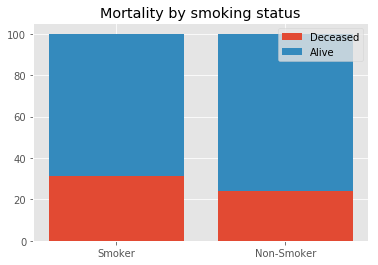

In [12]:
print("Mortality rate among non-smoking women: " + str(mortality_rate(df_nonsmoker)))
print("Mortality rate among smoking women: " + str(mortality_rate(df_smoker)))
print("Smoking rate among deceased women: " + str(smoking_rate(df_dead)))
print("Smoking rate among alive women: " + str(smoking_rate(df_alive)))

tab = pd.DataFrame({
    "Smoker": [mortality_rate(df_smoker)*100, (1 - mortality_rate(df_smoker))*100],
    "Non-Smoker": [mortality_rate(df_nonsmoker)*100, (1 - mortality_rate(df_nonsmoker))*100]
}, index=["Deceased", "Alive"])

plt.bar(["Smoker", "Non-Smoker"], tab.loc["Deceased"], label='Deceased')
plt.bar(["Smoker", "Non-Smoker"], tab.loc["Alive"], bottom=tab.loc["Deceased"], label='Alive')
plt.legend()
plt.title("Mortality by smoking status")
plt.show()

## V) Analysis by age group

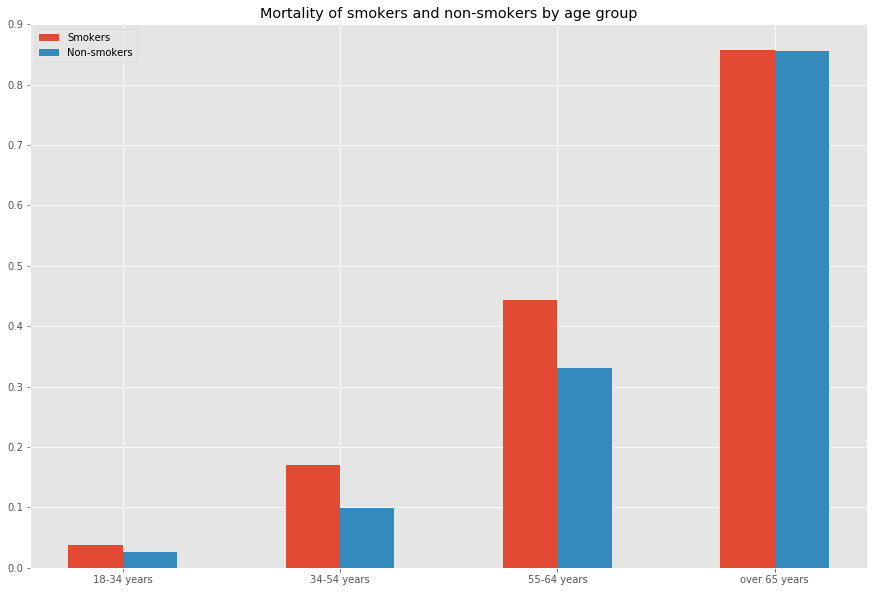

Proportion of women over 65 among smokers: 8%
Proportion of women over 65 among non-smokers: 26%


In [13]:
df["age_group"] = df["age"].apply(lambda a: 1 if a < 35 else 2 if a < 55 else 3 if a < 65 else 4)

df_smoker = df[df["smoker"] == 1]
df_nonsmoker = df[df["smoker"] == 0]

mortality_smoker = [mortality_rate(df_smoker[df_smoker["age_group"] == i]) for i in range(1,5)]
mortality_nonsmoker = [mortality_rate(df_nonsmoker[df_nonsmoker["age_group"] == i]) for i in range(1,5)]

age_labels = ["18-34 years", "34-54 years", "55-64 years", "over 65 years"]
bar_width = 0.25
r1 = range(len(mortality_smoker))
r2 = [x + bar_width for x in r1]

fig, ax = plt.subplots(figsize=(15,10))
plt.bar(r1, mortality_smoker, width=bar_width, label='Smokers')
plt.bar(r2, mortality_nonsmoker, width=bar_width, label='Non-smokers')
plt.xticks([r + bar_width/2 for r in range(len(mortality_smoker))], age_labels)
plt.legend()
plt.title("Mortality of smokers and non-smokers by age group")
plt.show()

print(f"Proportion of women over 65 among smokers: {int(100 * np.sum(df_smoker['age_group'] == 4) / len(df_smoker['age_group']))}%")
print(f"Proportion of women over 65 among non-smokers: {int(100 * np.sum(df_nonsmoker['age_group'] == 4) / len(df_nonsmoker['age_group']))}%")

## VI) Analysis using logistic regression

Model accuracy: 82.98%
Confusion matrix:
[[ 51  37]
 [ 19 222]]


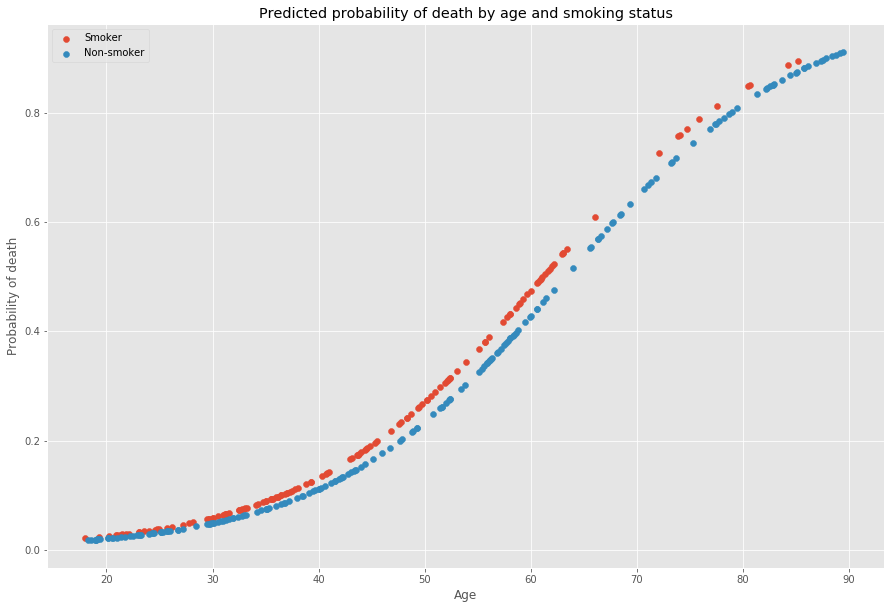

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X = df[["smoker", "age"]]
y = df[["alive"]]

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

logistic_model = LogisticRegression(random_state=0, solver='liblinear')
logistic_model.fit(x_train, y_train.values.ravel())

accuracy = logistic_model.score(x_test, y_test)
print(f"Model accuracy: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_true=y_test, y_pred=logistic_model.predict(x_test))
print("Confusion matrix:")
print(conf_matrix)

model_output = logistic_model.predict_proba(x_test)
# Probability of death (alive=0)
probas_pred = model_output[:, logistic_model.classes_ == 0].flatten()

fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(x_test[x_test['smoker'] == 1]["age"], probas_pred[x_test['smoker'] == 1], label='Smoker')
plt.scatter(x_test[x_test['smoker'] == 0]["age"], probas_pred[x_test['smoker'] == 0], label='Non-smoker')
plt.legend()
plt.title("Predicted probability of death by age and smoking status")
plt.xlabel("Age")
plt.ylabel("Probability of death")
plt.show()

# Answers to Questions

**Why is the initial result surprising?**  
At first glance, the mortality rate among non-smokers is higher than that among smokers, which contradicts expectations since smoking is generally harmful. This is a classic example of Simpson's paradox.

**Why is this result surprising after considering age groups? Can you explain this paradox?**  
After stratifying by age groups, it becomes evident that mortality is higher for smokers within each age group, but the overall mortality appears higher for non-smokers because the non-smoking group has a greater proportion of older women, who naturally have higher mortality rates. This confounding factor creates the paradox.

**Does logistic regression allow concluding on the harmfulness of smoking?**  
Yes, logistic regression accounting for age and smoking status shows smokers have a higher probability of death at any given age, supporting the conclusion that smoking is harmful.